# Title: Novartis Data Science Hiring Challenge
# Environment : Kaggle web-based data-science environment 

#  Please find the below summary of my profile, Actively looking for a job.




*  ## Name            : Saikumar Ganneboyina
*  ## Current employer: Wells Fargo
*  ## Linked in URL   : https://www.linkedin.com/in/saikumar-ganneboyina-077a187b/
*  ## mobile number   : +91-9980626857
*  ## email id        : saiganne@gmail.com


In [1]:
# Import the necessary libraries 
import os
import numpy as np 
import pandas as pd 
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# For This Hiring hackathon i'm using kaggle environment
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/Dataset/sample_submission.csv
/kaggle/input/Dataset/Test.csv
/kaggle/input/Dataset/Train.csv


# 1) Data Preparation 

In [3]:
#loading train,test and sample data

train=pd.read_csv("/kaggle/input/Dataset/Train.csv")
test = pd.read_csv("/kaggle/input/Dataset/Test.csv")
sample=pd.read_csv("/kaggle/input/Dataset/sample_submission.csv")

In [4]:
# checking the shapes
print("test shape  = ",test.shape)
print("train shape = ",train.shape)
print("sample shape =",sample.shape)

test shape  =  (15903, 17)
train shape =  (23856, 18)
sample shape = (7, 2)


In [5]:
#combining train and test dataset to generate new data set "df" data preparation

test['MULTIPLE_OFFENSE']=np.nan
train['istrain']=1
test['istrain']=0
INCIDENT_ID=test['INCIDENT_ID']
test=test[train.columns]
df=pd.concat([train,test],axis=0)
print("Combinded shape = ",df.shape)

Combinded shape =  (39759, 19)


#   2) Feature engineering ( extracting features/columns from given columns in the dataset)

In [6]:
# here i'm writing a function/method to extract the week of month
from math import ceil

def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

In [7]:
# from Date column i'm extracting more features like day,month,week of month,weekday and year

df['DATE']=pd.to_datetime(df['DATE'],format='%d-%b-%y') 
df['day'] = df['DATE'].dt.day
df['month'] = df['DATE'].dt.month
df['wom']=df['DATE'].apply(lambda x: week_of_month(x))
df['weekday'] = df['DATE'].dt.weekday
df['year'] = df['DATE'].dt.year

# dropping the date column as i extraced some usefulfeatures from this
df.drop(['DATE'],axis=1,inplace=True)  

In [8]:
# seperating train and test dataset after data preparation

train=df[df['istrain']==1]
del train['istrain']
test=df[df['istrain']==0]
test.drop(['MULTIPLE_OFFENSE','istrain'],axis=1,inplace=True)


# 3) Exploratory Data Analysis

In [9]:
#checking for the class imbalance

print('No hack (Target:0)', round(train['MULTIPLE_OFFENSE'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('hack (Target:1)', round(train['MULTIPLE_OFFENSE'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

# from output we can confirm that class imbalance exists in the given data ( 4.5% is no-hack i.e '0' and 95.5% is hack i.e '1')

## whenever we have class imbalance we need to take  care the below things:-
### we need do stratify split our  train and test data for accurate validation
### Need to maintain class balance in train data by either oversampling or under sampling
### here in this hackathon i'm not doing any oversampling or under sampling because many advance algorithm has inbuilt feature to handle this class imbalance problem


No hack (Target:0) 4.48 % of the dataset
hack (Target:1) 95.52 % of the dataset


In [10]:
# dropping duplicate rows in train dataset

train.drop(['INCIDENT_ID'],axis=1,inplace=True)

print("Train shape before dropping duplicates -->",train.shape)

train.drop_duplicates(keep='first',inplace=True)
print("Train shape after dropping duplicates -->",train.shape)

Train shape before dropping duplicates --> (23856, 21)
Train shape after dropping duplicates --> (23851, 21)


In [11]:
# checking for null values in data frame (train+test)
print(df.drop(['MULTIPLE_OFFENSE'],axis=1).isnull().sum())

# From output we have a total of 309 null values for X_12 variable (train and test dataset combined)

INCIDENT_ID      0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           309
X_13             0
X_14             0
X_15             0
istrain          0
day              0
month            0
wom              0
weekday          0
year             0
dtype: int64


In [12]:
# Now lets check for the pattern in null values 
df.loc[(df['X_12'].isnull(),'year')].value_counts()

# from output, it's clear that null values exists only for year 2017 and 2018

## Below few things can be followed for handling null values for the given data set

# 1) The null rows in the train data can deleted ( works best when we have a few null rows compared to entire dataset) 
# 2) Impute the null values using column mean/mode/median values ( mode is more suitable for our given dataset)
# 3) Imputing null values by machine learning algorithms like KNN
# 4) Many of the advance machine learning algorithms have inbuilt functionalities to handle null values



2017    167
2018    142
Name: year, dtype: int64

In [13]:
# importing missing values using ffill/bfill

#train['X_12'] = train['X_12'].ffill()
#test['X_12'] = test['X_12'].ffill()
#train['X_12'] = train['X_12'].bfill()
#test['X_12'] = test['X_12'].bfill()

In [14]:
train.info() # displays the column name,not-null count and their datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23851 entries, 0 to 23855
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X_1               23851 non-null  int64  
 1   X_2               23851 non-null  int64  
 2   X_3               23851 non-null  int64  
 3   X_4               23851 non-null  int64  
 4   X_5               23851 non-null  int64  
 5   X_6               23851 non-null  int64  
 6   X_7               23851 non-null  int64  
 7   X_8               23851 non-null  int64  
 8   X_9               23851 non-null  int64  
 9   X_10              23851 non-null  int64  
 10  X_11              23851 non-null  int64  
 11  X_12              23669 non-null  float64
 12  X_13              23851 non-null  int64  
 13  X_14              23851 non-null  int64  
 14  X_15              23851 non-null  int64  
 15  MULTIPLE_OFFENSE  23851 non-null  float64
 16  day               23851 non-null  int64 

In [15]:
train.describe() # gives the distribution of the train dataset

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,day,month,wom,weekday,year
count,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,...,23669.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000,23851.000000
mean,0.483544,24.789065,24.635529,4.277305,2.455956,6.153830,4.876274,0.972622,4.924112,1.244853,...,0.974186,85.234665,72.675401,33.463503,0.955222,15.564295,6.508700,3.086495,2.980588,2004.249633
std,1.439256,15.241092,15.136074,2.944703,1.963146,4.471736,3.882033,1.453242,1.362767,1.119412,...,1.167797,27.599231,43.299411,8.387029,0.206821,8.776369,3.293644,1.311049,1.994941,7.795014
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1991.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,...,1.000000,72.000000,29.000000,34.000000,1.000000,8.000000,4.000000,2.000000,1.000000,1998.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,...,1.000000,98.000000,62.000000,34.000000,1.000000,15.000000,7.000000,3.000000,3.000000,2004.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,...,1.000000,103.000000,107.000000,34.000000,1.000000,23.000000,9.000000,4.000000,5.000000,2011.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,...,90.000000,116.000000,142.000000,50.000000,1.000000,31.000000,12.000000,6.000000,6.000000,2018.000000


Text(0.5, 1.0, 'X_9')

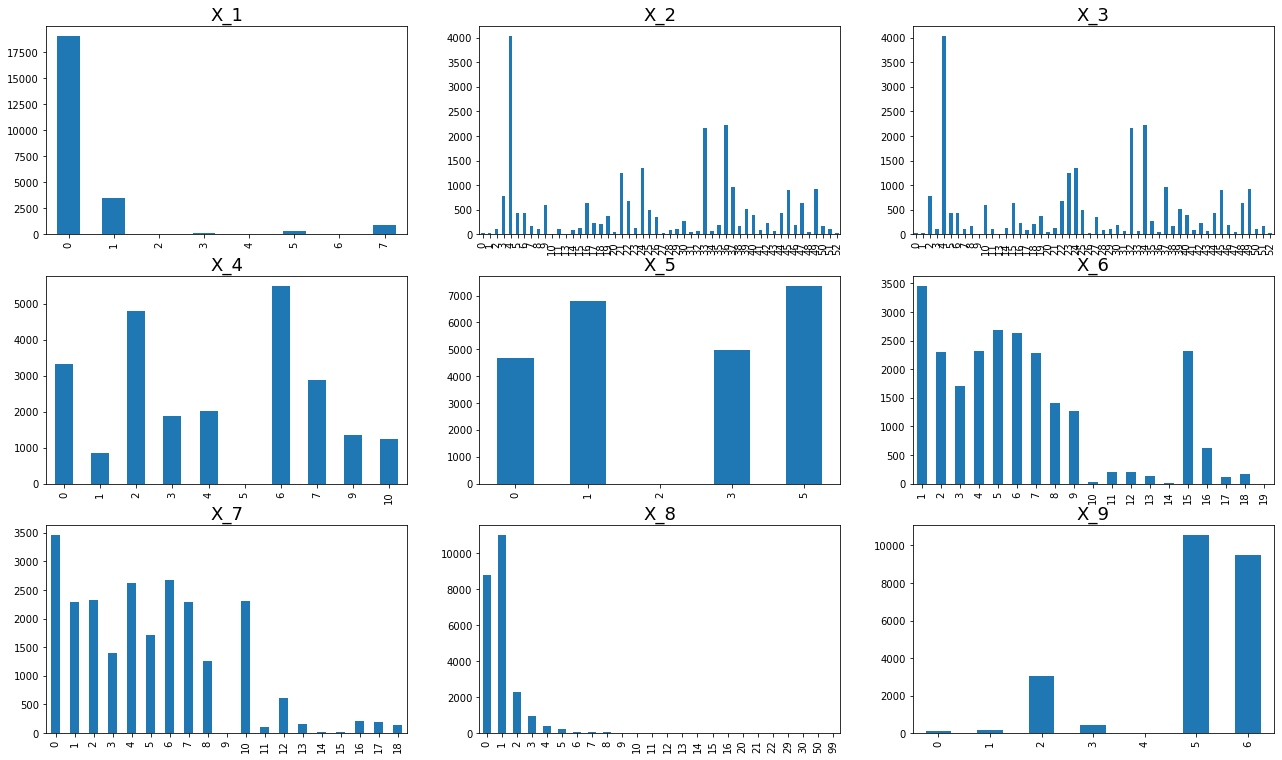

In [16]:
# visualing the frequency counts of columns X_1,X_2....X_9
fig, axarr = plt.subplots(3, 3, figsize=(22,13))

train['X_1'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('X_1', fontsize=18)
train['X_2'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('X_2', fontsize=18)
train['X_3'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title('X_3', fontsize=18)
train['X_4'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('X_4', fontsize=18)
train['X_5'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('X_5', fontsize=18)
train['X_6'].value_counts().sort_index().plot.bar(ax=axarr[1][2])
axarr[1][2].set_title('X_6', fontsize=18)
train['X_7'].value_counts().sort_index().plot.bar(ax=axarr[2][0])
axarr[2][0].set_title('X_7', fontsize=18)
train['X_8'].value_counts().sort_index().plot.bar(ax=axarr[2][1])
axarr[2][1].set_title('X_8', fontsize=18)
train['X_9'].value_counts().sort_index().plot.bar(ax=axarr[2][2])
axarr[2][2].set_title('X_9', fontsize=18)


Text(0.5, 1.0, 'X_15')

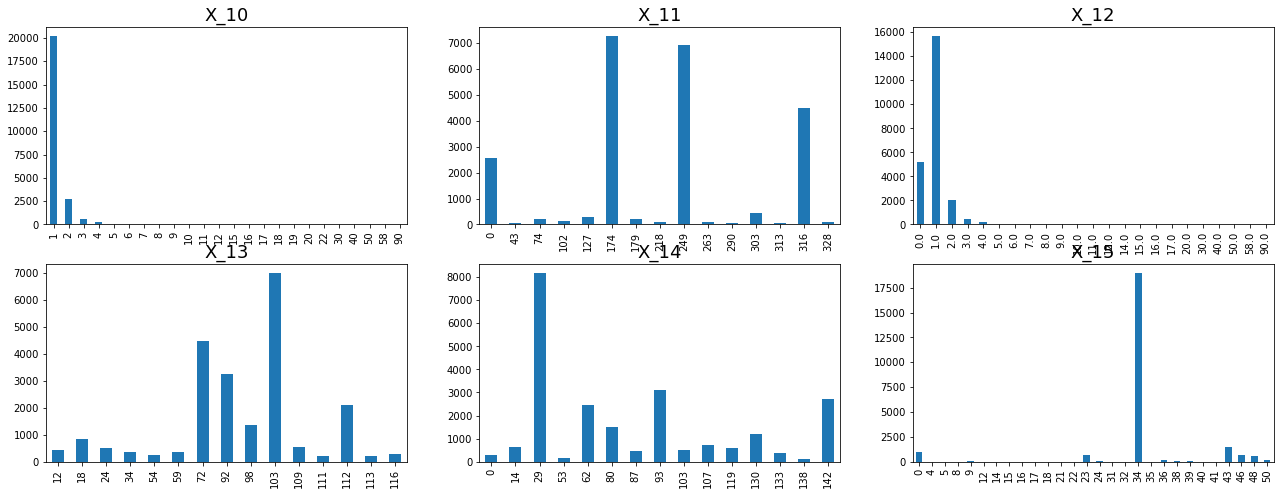

In [17]:
# visualing the frequency counts of columns X_10,X_11....X_15
fig, axarr = plt.subplots(2, 3, figsize=(22,8))

train['X_10'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('X_10', fontsize=18)
train['X_11'].value_counts().head(15).sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('X_11', fontsize=18)
train['X_12'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title('X_12', fontsize=18)
train['X_13'].value_counts().head(15).sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('X_13', fontsize=18)
train['X_14'].value_counts().head(15).sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('X_14', fontsize=18)
train['X_15'].value_counts().sort_index().plot.bar(ax=axarr[1][2])
axarr[1][2].set_title('X_15', fontsize=18)


In [18]:
# Displaying the unique values in the each column
cols= [ 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8',
       'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'day', 'month', 'wom', 'weekday', 'year']
for col in cols:
    print("unique values in column ",col," is -->",train[col].nunique())

unique values in column  X_1  is --> 8
unique values in column  X_2  is --> 52
unique values in column  X_3  is --> 52
unique values in column  X_4  is --> 10
unique values in column  X_5  is --> 5
unique values in column  X_6  is --> 19
unique values in column  X_7  is --> 19
unique values in column  X_8  is --> 24
unique values in column  X_9  is --> 7
unique values in column  X_10  is --> 24
unique values in column  X_11  is --> 133
unique values in column  X_12  is --> 23
unique values in column  X_13  is --> 60
unique values in column  X_14  is --> 62
unique values in column  X_15  is --> 28
unique values in column  MULTIPLE_OFFENSE  is --> 2
unique values in column  day  is --> 31
unique values in column  month  is --> 12
unique values in column  wom  is --> 6
unique values in column  weekday  is --> 7
unique values in column  year  is --> 28


In [19]:
#displays hack and no_hack counts grouped by year
train.groupby(['year','MULTIPLE_OFFENSE'])['MULTIPLE_OFFENSE'].count()

year  MULTIPLE_OFFENSE
1991  0.0                   15
      1.0                  497
1992  0.0                   21
      1.0                  771
1993  0.0                   30
      1.0                  932
1994  0.0                   26
      1.0                  696
1995  0.0                   50
      1.0                  788
1996  0.0                   66
      1.0                  974
1997  0.0                   57
      1.0                  895
1998  0.0                   55
      1.0                  892
1999  0.0                   34
      1.0                  831
2000  0.0                   42
      1.0                  973
2001  0.0                   48
      1.0                 1138
2002  0.0                   30
      1.0                  814
2003  0.0                   33
      1.0                  857
2004  0.0                   34
      1.0                  863
2005  0.0                   37
      1.0                  835
2006  0.0                   53
      1.0       

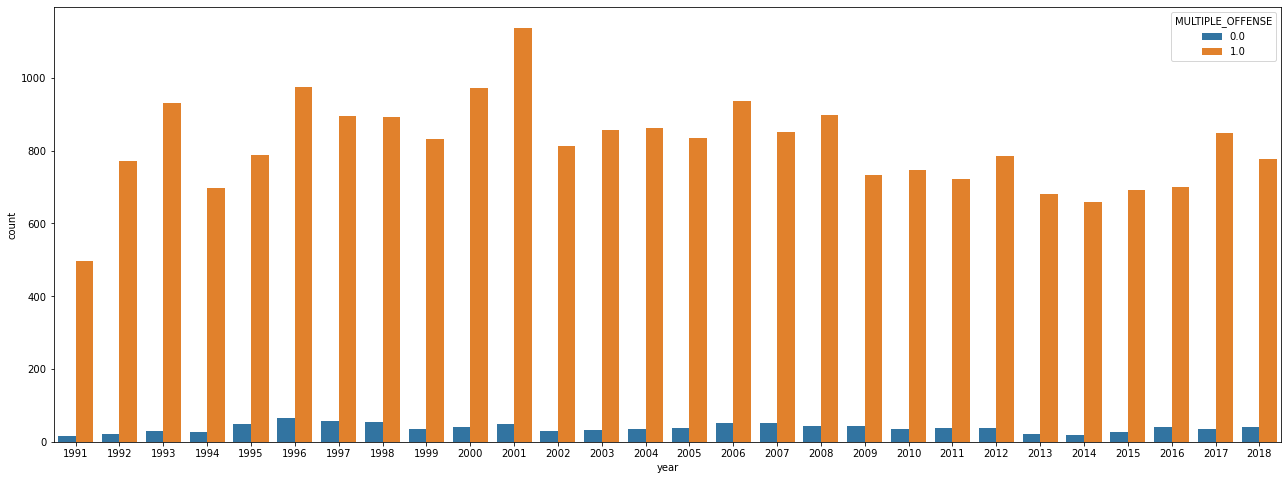

In [20]:
# plotting the MULTIPLE_OFFENSE count with respect to years

fig, axarr = plt.subplots(figsize=(22,8))
sns.countplot(x='year',data=train,hue='MULTIPLE_OFFENSE')

In [21]:
#x = train.drop(['MULTIPLE_OFFENSE'], axis=1)
#y = train['MULTIPLE_OFFENSE']

#sm = RandomOverSampler(random_state=5,sampling_strategy='not majority')
#x_sm, y_sm = sm.fit_resample(x,y)
#x_sm = pd.DataFrame(x_sm)
#x_sm.columns = x.columns
#train=pd.concat([x_sm,y_sm],axis=1,)

In [22]:
import h2o
from h2o.automl import H2OAutoML

# learn more about h2o in the given url "https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html"

In [23]:
h2o.init(nthreads=-1,max_mem_size='16g',min_mem_size='12g')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvrja7zrh
  JVM stdout: /tmp/tmpvrja7zrh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvrja7zrh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,1 month and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_qb07tw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [24]:
#load data as h2o frames

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
train_x=train.drop(['MULTIPLE_OFFENSE'],axis=1)
x = train_x.columns
y ='MULTIPLE_OFFENSE'

train['MULTIPLE_OFFENSE']=train['MULTIPLE_OFFENSE'].asfactor()

In [26]:
# Run automl to train the model
aml_ti = H2OAutoML(max_runtime_secs=4000,max_models=None,seed= 7,nfolds=10,include_algos = ["GBM", "DeepLearning","XGBoost","DRF","StackedEnsemble"])
aml_ti.train(x = x, y = y,training_frame =train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [27]:
#multiples models and their auc scores are displayed in sorted order
lb_ti = aml_ti.leaderboard
lb_ti

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20200621_061838_model_4,0.999973,0.0025913,0.999999,0.00621782,0.0255593,0.000653276
GBM_1_AutoML_20200621_061838,0.999967,0.00236801,0.999998,0.00343078,0.0244666,0.000598616
GBM_grid__1_AutoML_20200621_061838_model_9,0.999948,0.00274432,0.999998,0.00394283,0.0256378,0.000657298
GBM_grid__1_AutoML_20200621_061838_model_8,0.999935,0.00241505,0.999997,0.00336494,0.0229239,0.000525507
GBM_grid__1_AutoML_20200621_061838_model_11,0.999908,0.00241496,0.999996,0.00432321,0.0233054,0.00054314
GBM_2_AutoML_20200621_061838,0.999904,0.00331267,0.999995,0.004411,0.0282524,0.000798196
GBM_grid__1_AutoML_20200621_061838_model_5,0.999904,0.00456635,0.999995,0.00911459,0.0325413,0.00105894
GBM_3_AutoML_20200621_061838,0.9999,0.00352909,0.999995,0.00534733,0.0282797,0.00079974
GBM_4_AutoML_20200621_061838,0.999879,0.00453673,0.999994,0.00645923,0.0332948,0.00110854
GBM_grid__1_AutoML_20200621_061838_model_6,0.999876,0.00585023,0.999994,0.00806124,0.0382081,0.00145986


In [28]:
# Get the first model which have high accuracy 
m = h2o.get_model(lb_ti[1,"model_id"])
m

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20200621_061838


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,210.0,210.0,156385.0,6.0,6.0,6.0,22.0,64.0,54.57619




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.060111732079867e-07
RMSE: 0.00045388453730875954
LogLoss: 5.645540392463017e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9787953544653097: 


,,0,1,Error,Rate
0,0,1068.0,0.0,0.0,(0.0/1068.0)
1,1,0.0,22783.0,0.0,(0.0/22783.0)
2,Total,1068.0,22783.0,0.0,(0.0/23851.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.978795,1.000000,207.0
1,max f2,0.978795,1.000000,207.0
2,max f0point5,0.978795,1.000000,207.0
3,max accuracy,0.978795,1.000000,207.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.978795,1.000000,207.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.978795,1.000000,207.0
8,max min_per_class_accuracy,0.978795,1.000000,207.0
9,max mean_per_class_accuracy,0.978795,1.000000,207.0



Gains/Lift Table: Avg response rate: 95.52 %, avg score: 95.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010021,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.010490,4.687706,4.687706
1,,2,0.020041,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.020981,4.687706,4.687706
2,,3,0.030020,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.031427,4.687706,4.687706
3,,4,0.040040,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.041917,4.687706,4.687706
4,,5,0.050019,9.999998e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.052364,4.687706,4.687706
5,,6,0.100038,9.999998e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.104727,4.687706,4.687706
6,,7,0.150015,9.999997e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052320,0.157047,4.687706,4.687706
7,,8,0.200034,9.999997e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.209411,4.687706,4.687706
8,,9,0.300029,9.999996e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.314094,4.687706,4.687706
9,,10,0.400025,9.999996e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.418777,4.687706,4.687706




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.0005986161293767078
RMSE: 0.024466632979973108
LogLoss: 0.0023680131345666807
Mean Per-Class Error: 0.001375253346957983
AUC: 0.9999674711465165
AUCPR: 0.9999984684412351
Gini: 0.999934942293033

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7686364825162502: 


,,0,1,Error,Rate
0,0,1061.0,7.0,0.0066,(7.0/1068.0)
1,1,7.0,22776.0,0.0003,(7.0/22783.0)
2,Total,1068.0,22783.0,0.0006,(14.0/23851.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.768636,0.999693,187.0
1,max f2,0.768636,0.999693,187.0
2,max f0point5,0.935574,0.999763,175.0
3,max accuracy,0.806387,0.999413,185.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.042807,1.000000,228.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.806387,0.993145,185.0
8,max min_per_class_accuracy,0.988087,0.998127,149.0
9,max mean_per_class_accuracy,0.965801,0.998625,169.0



Gains/Lift Table: Avg response rate: 95.52 %, avg score: 95.55 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010021,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.010490,4.687706,4.687706
1,,2,0.020041,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.020981,4.687706,4.687706
2,,3,0.030020,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.031427,4.687706,4.687706
3,,4,0.040040,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.041917,4.687706,4.687706
4,,5,0.050019,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.052364,4.687706,4.687706
5,,6,0.100038,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.104727,4.687706,4.687706
6,,7,0.150015,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052320,0.157047,4.687706,4.687706
7,,8,0.200034,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.209411,4.687706,4.687706
8,,9,0.300029,9.999998e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.314094,4.687706,4.687706
9,,10,0.400025,9.999994e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.418777,4.687706,4.687706




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.99958074,5.590203E-4,0.9991618,0.99958074,1.0,0.99832284,1.0,1.0,0.9991614,1.0,1.0,0.99958074
1,auc,0.9999231,1.7432842E-4,0.9999634,0.9999957,1.0,0.99945027,1.0,1.0,0.9998298,1.0,1.0,0.9999921
2,aucpr,0.99999636,8.376792E-6,0.9999983,0.9999998,1.0,0.9999735,1.0,1.0,0.99999225,1.0,1.0,0.99999964
3,err,4.1925206E-4,5.590203E-4,8.38223E-4,4.1928721E-4,0.0,0.0016771489,0.0,0.0,8.3857443E-4,0.0,0.0,4.1928721E-4
4,err_count,1.0,1.3333334,2.0,1.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,1.0
5,f0point5,0.99972814,4.3434976E-4,0.9998243,0.9996497,1.0,0.9985972,1.0,1.0,0.9995618,1.0,1.0,0.99964833
6,f1,0.99978065,2.9241396E-4,0.99956083,0.999781,1.0,0.9991228,1.0,1.0,0.9995618,1.0,1.0,0.9997802
7,f2,0.9998333,2.4634838E-4,0.9992975,0.9999124,1.0,0.9996489,1.0,1.0,0.9995618,1.0,1.0,0.9999121
8,lift_top_group,1.0468811,0.0021671643,1.04741,1.0446781,1.0442207,1.0469711,1.0474309,1.0460526,1.0451359,1.0515873,1.0465117,1.0488126
9,logloss,0.0023679654,0.002410465,0.003507612,0.0015627702,2.0619745E-4,0.0077195694,2.866703E-4,7.647204E-4,0.0044754953,3.475409E-4,0.0015088889,0.0033001888



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-06-21 06:24:15,1 min 11.029 sec,0.0,0.206816,0.182842,0.500000,0.955222,1.000000,0.044778
1,,2020-06-21 06:24:15,1 min 11.261 sec,5.0,0.128668,0.071499,0.999370,0.999971,1.046877,0.004444
2,,2020-06-21 06:24:15,1 min 11.422 sec,10.0,0.097005,0.047792,0.999749,0.999988,1.046877,0.002641
3,,2020-06-21 06:24:15,1 min 11.546 sec,15.0,0.073884,0.032453,0.999831,0.999992,1.046877,0.001971
4,,2020-06-21 06:24:16,1 min 11.675 sec,20.0,0.059266,0.023431,0.999891,0.999995,1.046877,0.001426
5,,2020-06-21 06:24:16,1 min 11.800 sec,25.0,0.048082,0.017238,0.999959,0.999998,1.046877,0.000797
6,,2020-06-21 06:24:16,1 min 11.931 sec,30.0,0.040936,0.013213,0.999978,0.999999,1.046877,0.000671
7,,2020-06-21 06:24:16,1 min 12.066 sec,35.0,0.034866,0.010324,0.999989,0.999999,1.046877,0.000671
8,,2020-06-21 06:24:16,1 min 12.193 sec,40.0,0.029634,0.008018,0.999994,1.000000,1.046877,0.000419
9,,2020-06-21 06:24:16,1 min 12.323 sec,45.0,0.026005,0.006465,0.999997,1.000000,1.046877,0.000293



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,X_11,1734.730469,1.000000,0.515461
1,X_15,651.038208,0.375296,0.193451
2,X_10,600.109009,0.345938,0.178317
3,X_12,216.656540,0.124893,0.064378
4,X_13,33.010307,0.019029,0.009809
5,year,29.613209,0.017071,0.008799
6,X_8,22.873093,0.013185,0.006797
7,X_3,11.746863,0.006772,0.003490
8,X_2,11.509397,0.006635,0.003420
9,X_7,8.949556,0.005159,0.002659


In [29]:
# displays the variable importance of the dataset
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,X_11,1734.730469,1.000000,0.515461
1,X_15,651.038208,0.375296,0.193451
2,X_10,600.109009,0.345938,0.178317
3,X_12,216.656540,0.124893,0.064378
4,X_13,33.010307,0.019029,0.009809
5,year,29.613209,0.017071,0.008799
6,X_8,22.873093,0.013185,0.006797
7,X_3,11.746863,0.006772,0.003490
8,X_2,11.509397,0.006635,0.003420
9,X_7,8.949556,0.005159,0.002659


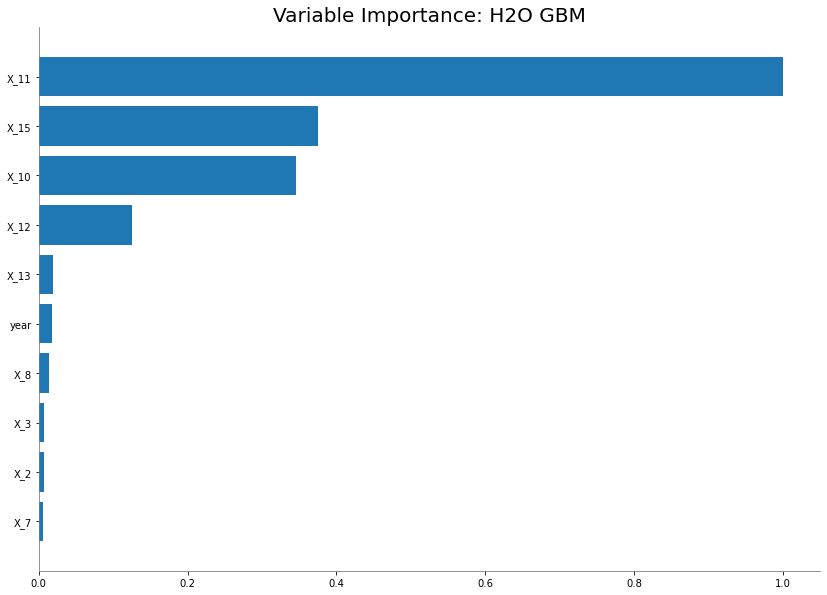

In [30]:
# visualizing the variable importance of the dataset
m.varimp_plot()

In [31]:
# Doing predictions on the test data
pred=aml_ti.leader.predict(test)
test_pred = pred.as_data_frame()

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [32]:
test_pred.head()

,predict,p0,p1
0,1,2.202372e-07,1.000000
1,1,2.811071e-08,1.000000
2,1,3.804058e-07,1.000000
3,1,3.067213e-06,0.999997
4,1,9.455999e-08,1.000000


In [33]:
result=pd.concat([INCIDENT_ID,test_pred['predict']],axis=1,ignore_index=True)

In [34]:
#generating output file
result=result.rename(columns={0: "INCIDENT_ID", 1: "MULTIPLE_OFFENSE"})
result.to_csv("saikumar_ganneboyina.csv",index=False)
result.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [35]:
# save the model
model_path = h2o.save_model(model=m,force=True)
print(model_path)

/kaggle/working/GBM_1_AutoML_20200621_061838


In [36]:
# load the model
saved_model = h2o.load_model(model_path)
print(saved_model)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20200621_061838


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,210.0,210.0,156385.0,6.0,6.0,6.0,22.0,64.0,54.57619




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.060111732079867e-07
RMSE: 0.00045388453730875954
LogLoss: 5.645540392463017e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9787953544653097: 


,,0,1,Error,Rate
0,0,1068.0,0.0,0.0,(0.0/1068.0)
1,1,0.0,22783.0,0.0,(0.0/22783.0)
2,Total,1068.0,22783.0,0.0,(0.0/23851.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.978795,1.000000,207.0
1,max f2,0.978795,1.000000,207.0
2,max f0point5,0.978795,1.000000,207.0
3,max accuracy,0.978795,1.000000,207.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.978795,1.000000,207.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.978795,1.000000,207.0
8,max min_per_class_accuracy,0.978795,1.000000,207.0
9,max mean_per_class_accuracy,0.978795,1.000000,207.0



Gains/Lift Table: Avg response rate: 95.52 %, avg score: 95.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010021,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.010490,4.687706,4.687706
1,,2,0.020041,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.020981,4.687706,4.687706
2,,3,0.030020,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.031427,4.687706,4.687706
3,,4,0.040040,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.041917,4.687706,4.687706
4,,5,0.050019,9.999998e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.052364,4.687706,4.687706
5,,6,0.100038,9.999998e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.104727,4.687706,4.687706
6,,7,0.150015,9.999997e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052320,0.157047,4.687706,4.687706
7,,8,0.200034,9.999997e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.209411,4.687706,4.687706
8,,9,0.300029,9.999996e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.314094,4.687706,4.687706
9,,10,0.400025,9.999996e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.418777,4.687706,4.687706




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.0005986161293767078
RMSE: 0.024466632979973108
LogLoss: 0.0023680131345666807
Mean Per-Class Error: 0.001375253346957983
AUC: 0.9999674711465165
AUCPR: 0.9999984684412351
Gini: 0.999934942293033

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7686364825162502: 


,,0,1,Error,Rate
0,0,1061.0,7.0,0.0066,(7.0/1068.0)
1,1,7.0,22776.0,0.0003,(7.0/22783.0)
2,Total,1068.0,22783.0,0.0006,(14.0/23851.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.768636,0.999693,187.0
1,max f2,0.768636,0.999693,187.0
2,max f0point5,0.935574,0.999763,175.0
3,max accuracy,0.806387,0.999413,185.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.042807,1.000000,228.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.806387,0.993145,185.0
8,max min_per_class_accuracy,0.988087,0.998127,149.0
9,max mean_per_class_accuracy,0.965801,0.998625,169.0



Gains/Lift Table: Avg response rate: 95.52 %, avg score: 95.55 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010021,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.010490,4.687706,4.687706
1,,2,0.020041,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.020981,4.687706,4.687706
2,,3,0.030020,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.031427,4.687706,4.687706
3,,4,0.040040,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010490,0.041917,4.687706,4.687706
4,,5,0.050019,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.010446,0.052364,4.687706,4.687706
5,,6,0.100038,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.104727,4.687706,4.687706
6,,7,0.150015,1.000000e+00,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052320,0.157047,4.687706,4.687706
7,,8,0.200034,9.999999e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.052364,0.209411,4.687706,4.687706
8,,9,0.300029,9.999998e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.314094,4.687706,4.687706
9,,10,0.400025,9.999994e-01,1.046877,1.046877,1.000000,1.000000,1.000000,1.000000,0.104683,0.418777,4.687706,4.687706




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.99958074,5.590203E-4,0.9991618,0.99958074,1.0,0.99832284,1.0,1.0,0.9991614,1.0,1.0,0.99958074
1,auc,0.9999231,1.7432842E-4,0.9999634,0.9999957,1.0,0.99945027,1.0,1.0,0.9998298,1.0,1.0,0.9999921
2,aucpr,0.99999636,8.376792E-6,0.9999983,0.9999998,1.0,0.9999735,1.0,1.0,0.99999225,1.0,1.0,0.99999964
3,err,4.1925206E-4,5.590203E-4,8.38223E-4,4.1928721E-4,0.0,0.0016771489,0.0,0.0,8.3857443E-4,0.0,0.0,4.1928721E-4
4,err_count,1.0,1.3333334,2.0,1.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,1.0
5,f0point5,0.99972814,4.3434976E-4,0.9998243,0.9996497,1.0,0.9985972,1.0,1.0,0.9995618,1.0,1.0,0.99964833
6,f1,0.99978065,2.9241396E-4,0.99956083,0.999781,1.0,0.9991228,1.0,1.0,0.9995618,1.0,1.0,0.9997802
7,f2,0.9998333,2.4634838E-4,0.9992975,0.9999124,1.0,0.9996489,1.0,1.0,0.9995618,1.0,1.0,0.9999121
8,lift_top_group,1.0468811,0.0021671643,1.04741,1.0446781,1.0442207,1.0469711,1.0474309,1.0460526,1.0451359,1.0515873,1.0465117,1.0488126
9,logloss,0.0023679654,0.002410465,0.003507612,0.0015627702,2.0619745E-4,0.0077195694,2.866703E-4,7.647204E-4,0.0044754953,3.475409E-4,0.0015088889,0.0033001888



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-06-21 06:24:15,1 min 11.029 sec,0.0,0.206816,0.182842,0.500000,0.955222,1.000000,0.044778
1,,2020-06-21 06:24:15,1 min 11.261 sec,5.0,0.128668,0.071499,0.999370,0.999971,1.046877,0.004444
2,,2020-06-21 06:24:15,1 min 11.422 sec,10.0,0.097005,0.047792,0.999749,0.999988,1.046877,0.002641
3,,2020-06-21 06:24:15,1 min 11.546 sec,15.0,0.073884,0.032453,0.999831,0.999992,1.046877,0.001971
4,,2020-06-21 06:24:16,1 min 11.675 sec,20.0,0.059266,0.023431,0.999891,0.999995,1.046877,0.001426
5,,2020-06-21 06:24:16,1 min 11.800 sec,25.0,0.048082,0.017238,0.999959,0.999998,1.046877,0.000797
6,,2020-06-21 06:24:16,1 min 11.931 sec,30.0,0.040936,0.013213,0.999978,0.999999,1.046877,0.000671
7,,2020-06-21 06:24:16,1 min 12.066 sec,35.0,0.034866,0.010324,0.999989,0.999999,1.046877,0.000671
8,,2020-06-21 06:24:16,1 min 12.193 sec,40.0,0.029634,0.008018,0.999994,1.000000,1.046877,0.000419
9,,2020-06-21 06:24:16,1 min 12.323 sec,45.0,0.026005,0.006465,0.999997,1.000000,1.046877,0.000293



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,X_11,1734.730469,1.000000,0.515461
1,X_15,651.038208,0.375296,0.193451
2,X_10,600.109009,0.345938,0.178317
3,X_12,216.656540,0.124893,0.064378
4,X_13,33.010307,0.019029,0.009809
5,year,29.613209,0.017071,0.008799
6,X_8,22.873093,0.013185,0.006797
7,X_3,11.746863,0.006772,0.003490
8,X_2,11.509397,0.006635,0.003420
9,X_7,8.949556,0.005159,0.002659
